**Applied Mathematics I**

**Chapter 7 Homework Optional**

**Vance Turnewitsch**

**Part i Euler Method**

The Euler method is probably the most simple numerical method for approximating a differential equation. In it we use the concept of the derivative itself: slope. Using small time steps, $\Delta t$, we use the slope to essentially guide our iterations of $x_i$ points. The method's basic derivation is below:

Given a differential equation: $x'=f(t,x)$ we think of the derivative as the slope of two discrete points:

$x'=\cfrac{x_{k+1}-x_k}{\Delta t}=f(t,x_k)$

We then simply solve for $x_{k+1}$ which is what we seek in an approximation:

$x_{k+1}-x_k=f(t,x_k)\Delta t$

$x_{k+1}=x_k+f(t,x_k)\Delta t$

We now write a Python function to approximate this method.

In [158]:
# First, we import some necessary python packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
def euler(xk,t,dt,f):
    # This is our euler approximation function. 
    # It will generate: xk + f(t,xk)*dt
    return xk + f(t,xk)*dt

Let's test our appoximation on a simple non-linear differential equation:

$x' = sin(t)$ where $x(0)=1$

The solution is: $x(t)=2-cos(t)$

We will construct our entire approximation within a single function which allows testing on different functions:

In [160]:
def eulerTest(derivFunction,actualSolution,t0,t1,x0,dt,exactText):
    points = (t1-t0)/dt + 1. # The number of points we approximate including the initial point
    t = np.linspace(t0,t1,points) # The time points at which we will approximate
    print "The time points>",t
    x = np.zeros((1,points)) # List for holding approximate function values
    x[0][0]=x0 # Fill in the initial condition
    for i in xrange(np.size(x[0])-1): # We perform the Euler approximation
        xk = x[0][i]
        ti = t[i+1]
        val = euler(xk,ti,dt,deriv)
        x[0][i+1]=val
    print "The approximate solution>",x
    print "Now we graph:"
    exact_V = np.vectorize(actualSolution) # We vectorize the function for simple evaluation
    x2 = exact_V(t) # Evaluate :)
    plt.plot(t,x2,"^",label=exactText)
    plt.plot(t,x[0],"*",label='Euler Approx')
    plt.title("Approximation and Exact Solution")
    plt.xlabel('time')
    plt.ylabel('x(t)')
    plt.legend() 
    # Now we plot the error
    error = np.abs(x2-x[0])
    plt.figure()
    plt.plot(t,error,"*")
    plt.title("Absolute Error of Approximate Solution")
    plt.xlabel('time')
    plt.ylabel('x(t)')
    plt.legend()     

In [161]:
def deriv(t,x):
    # This defines the right-side of the derivative
    # of which we approximate. 
    return np.sin(t)

The time points> [  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]
The approximate solution> [[ 1.          1.00998334  1.02985027  1.0594023   1.09834413  1.14628668
   1.20275093  1.2671727   1.33890831  1.417241    1.5013881   1.59050883
   1.68371274  1.78006856  1.87861353  1.97836303  2.07832039  2.17748687
   2.27487164  2.36950165  2.46043139  2.54675233  2.62760197  2.70217249
   2.76971881  2.82956602  2.88111616  2.9238

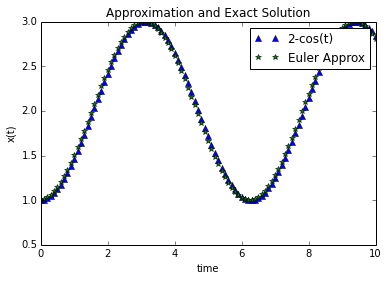

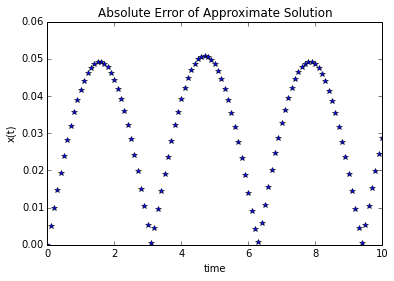

In [162]:
eulerTest(deriv,lambda x: 2.-np.cos(x),0,10,1.,0.1,'2-cos(t)')

We see that this approximation of the differential equation works quite well: the error appears to be bounded. This is not always the case. Let's try the following situation:

$x'=t\sin(t) + \cfrac{1}{t^2+1}$ which has the exact solution:

$x(t) = \arctan(t) + \sin(t) - t\cos(t)$ with $x(0)=0$

Let's see how this function does, first we define the derivative:

In [163]:
def deriv(t,x):
    return t**4 + t**3 + t**2 + t + 2.

Now let's make a function for the exact solution:

In [164]:
def exactSol(t):
    return t**5/5. + t**4/4. + t**3/3. + t**2/2. + 2*t

The time points> [  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]
The approximate solution> [[  0.00000000e+00   2.11110000e-01   4.36070000e-01   6.78580000e-01
    9.43540000e-01   1.23729000e+00   1.56785000e+00   1.94516000e+00
    2.38132000e+00   2.89083000e+00   3.49083000e+00   4.20134000e+00
    5.04550000e+00   6.04981000e+00   7.24437000e+00   8.66312000e+00
    1.03440800e+01   1.23295900e+01   1.46665500e+01   1.7406

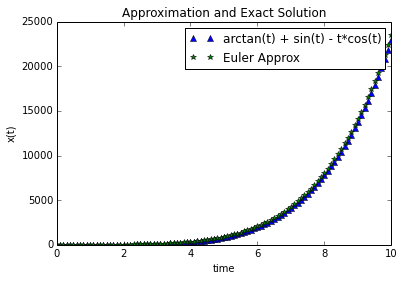

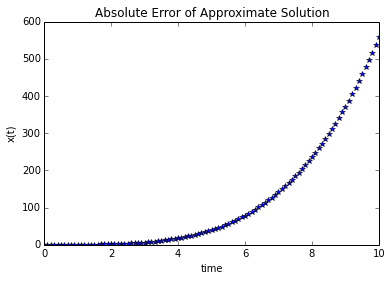

In [165]:
eulerTest(deriv,exactSol,0.,10.,0.,0.1,'arctan(t) + sin(t) - t*cos(t)')

As we observe, all though the solution remains somewhat good the error is slowly growing unbounded. For these and similar problems, we introduce the Improved Euler Method.

**Improved Euler Method**

It turns out there are some functions that the Euler approximation does not work quite so well for. Thus, we have the E

In [166]:
def eulerImproved(xk,t,dt,f):
    # This is our euler approximation function. 
    # It will generate: xk + f(t,xk)*dt
    mk = f(t,xk)
    yk = xk + f(t,xk)*dt
    nk = f(t + dt,yk)
    return xk + (mk+nk)/2.*dt

In [167]:
def eulerTestImproved(derivFunction,actualSolution,t0,t1,x0,dt,exactText):
    points = (t1-t0)/dt + 1. # The number of points we approximate including the initial point
    t = np.linspace(t0,t1,points) # The time points at which we will approximate
    print "The time points>",t
    x = np.zeros((1,points)) # List for holding approximate function values
    x[0][0]=x0 # Fill in the initial condition
    for i in xrange(np.size(x[0])-1): # We perform the Euler approximation
        xk = x[0][i]
        ti = t[i+1]
        val = eulerImproved(xk,ti,dt,deriv)
        x[0][i+1]=val
    print "The approximate solution>",x
    print "Now we graph:"
    exact_V = np.vectorize(actualSolution) # We vectorize the function for simple evaluation
    x2 = exact_V(t) # Evaluate :)
    plt.plot(t,x2,"^",label=exactText)
    plt.plot(t,x[0],"*",label='Euler Approx')
    plt.title("Approximation and Exact Solution")
    plt.xlabel('time')
    plt.ylabel('x(t)')
    plt.legend() 
    # Now we plot the error
    error = np.abs(x2-x[0])
    print x2
    print x
    plt.figure()
    plt.plot(t,error,"*")
    plt.title("Absolute Error of Approximate Solution")
    plt.xlabel('time')
    plt.ylabel('x(t)')
    plt.legend()     

The time points> [   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.]
The approximate solution> [[  2.00000000e+00   2.97370000e+04   1.93122000e+05   7.49782000e+05
    2.18809200e+06   5.30017700e+06   1.12569120e+07   2.16829220e+07
    3.87315820e+07   6.51600170e+07   1.04404102e+08   1.60653462e+08
    2.38926472e+08   3.45145257e+08   4.86210692e+08   6.70077402e+08
    9.05828762e+08   1.20375190e+09   1.57541268e+09   2.03373074e+09
    2.59305445e+09]]
Now we graph:
[  0.00000000e+00   8.45416667e+02   2.29033333e+04   1.65798750e+05
   6.82906667e+05   2.05635208e+06   5.07201000e+06   1.08945054e+07
   2.11422133e+07   3.79622588e+07   6.41055167e+07   1.03001612e+08
   1.58833920e+08   2.36614565e+08   3.42259423e+08   4.82663119e+08
   6.65774027e+08   9.00669272e+08   1.19762973e+09   1.56821503e+09
   2.02533853e+09]
[[  2.00000000e+00   2.97370000e+04   1.93122000e+05   7.49782000e+05
    2.188

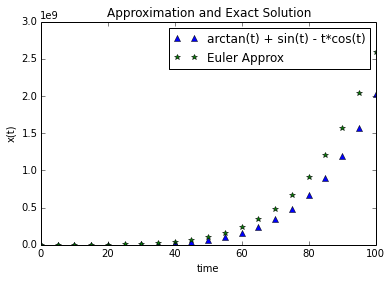

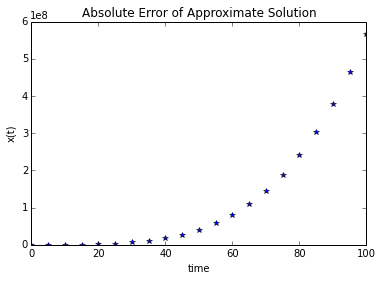

In [168]:
eulerTestImproved(deriv,exactSol,0.,100.,2.,5.,'arctan(t) + sin(t) - t*cos(t)')